# Random Forests Classification

* This model is based on the evaluation of the prediction produced by more than one decision tree.

![alt text](https://miro.medium.com/max/1052/1*VHDtVaDPNepRglIAv72BFg.jpeg)

## 1-)MODEL

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train) 
rf_model

RandomForestClassifier()

## 2-)Prediction

In [6]:
y_pred = rf_model.predict(X_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [8]:
accuracy_score(y_test, y_pred) # before model tuning

0.7445887445887446

In [9]:
confusion_matrix(y_test, y_pred) # before model tuning

array([[119,  32],
       [ 27,  53]], dtype=int64)

In [10]:
print(classification_report(y_test, y_pred)) # before model tuning

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



## 3-)Model Tuning

* In this section, we will try to determine the optimum **n_estimators, max_depth, max_features, min_samples_split**  with the GridSearchCV method.


* GridSearchCV: Grid Search Cross Validation Methode



* Then , we will create the most optimum model by using optimum **n_estimators, max_depth, max_features, min_samples_split**  .





* **n_estimators, max_depth, max_features, min_samples_split**  are the hyperparameters that we will determine according to ourselves and we want it to be the most optimum.



* But instead of relying on our own feeling and sense in order to find the  optimum value of these hyperparameters   , we will find the optimum value of these hyperparameters   by using the gridsearch method.




* **max_depth**:The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.




* **max_features**:The number of features to consider when looking for the best split:



* **n_estimators**:  The number of trees in the forest.



* **min_samples_split** the minimum number of samples required to split an internal node:


In [11]:
rf_model.max_features# default value of max faetures 

'auto'

In [13]:
print(rf_model.max_depth)# default value of max depth

None


In [15]:
rf_model.min_samples_split# default value of min_samples_split

2

In [17]:
rf_model.n_estimators#default value of n_estimators

100

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [21]:
rf_model = RandomForestClassifier()

In [22]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [23]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [24]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

### 3.1-) Tuned Model

In [25]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

In [26]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=500)

In [27]:
y_pred1 = rf_tuned.predict(X_test)
y_pred1[0:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [28]:
accuracy_score(y_test, y_pred1)# after model tuning

0.7445887445887446

In [29]:
confusion_matrix(y_test, y_pred1)# after model tuning

array([[118,  33],
       [ 26,  54]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred1))# after model tuning

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       151
           1       0.62      0.68      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



## 4-)Significance levels of independent variables

In [32]:
 rf_tuned.feature_importances_

array([0.05267709, 0.36658526, 0.07385805, 0.04955444, 0.05375997,
       0.16148448, 0.11090623, 0.13117448])

In [33]:
rf_tuned.feature_importances_*100

array([ 5.26770915, 36.6585263 ,  7.38580456,  4.95544391,  5.37599682,
       16.14844806, 11.09062336, 13.11744784])

In [34]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [35]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [36]:
Importance 

,Importance
Pregnancies,5.267709
Glucose,36.658526
BloodPressure,7.385805
SkinThickness,4.955444
Insulin,5.375997
BMI,16.148448
DiabetesPedigreeFunction,11.090623
Age,13.117448


In [39]:
Importance.sort_values(by = "Importance")

,Importance
SkinThickness,4.955444
Pregnancies,5.267709
Insulin,5.375997
BloodPressure,7.385805
DiabetesPedigreeFunction,11.090623
Age,13.117448
BMI,16.148448
Glucose,36.658526


In [40]:
Importance.sort_values(by = "Importance", 
                       axis = 0,)

,Importance
SkinThickness,4.955444
Pregnancies,5.267709
Insulin,5.375997
BloodPressure,7.385805
DiabetesPedigreeFunction,11.090623
Age,13.117448
BMI,16.148448
Glucose,36.658526


In [41]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True)

,Importance
SkinThickness,4.955444
Pregnancies,5.267709
Insulin,5.375997
BloodPressure,7.385805
DiabetesPedigreeFunction,11.090623
Age,13.117448
BMI,16.148448
Glucose,36.658526


In [44]:
import matplotlib.pyplot as plt

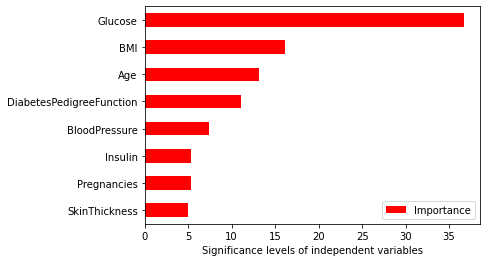

In [45]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")



plt.xlabel("Significance levels of independent variables");